<a href="https://colab.research.google.com/github/sonorus916/ACM-W-Website-Revamp/blob/master/Boston_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
rawBostonData = pd.read_csv\
                ('https://raw.githubusercontent.com/'\
                 'PacktWorkshops/The-Data-Science-'\
                 'Workshop/master/Chapter02/'\
                 'Dataset/Boston.csv')

In [ ]:
rawBostonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
rawBostonData.isnull().sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
rawBostonData.duplicated().sum()

0

In [ ]:
list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [ ]:
renamedBostonData = rawBostonData.rename\
                    (columns = {\
                     'CRIM':'crimeRatePerCapita',\
                     ' ZN ':'landOver25K_sqft',\
                     'INDUS ':'non-retailLandProptn',\
                     'CHAS':'riverDummy',\
                     'NOX':'nitrixOxide_pp10m',\
                     'RM':'AvgNo.RoomsPerDwelling',\
                     'AGE':'ProptnOwnerOccupied',\
                     'DIS':'weightedDist',\
                     'RAD':'radialHighwaysAccess',\
                     'TAX':'propTaxRate_per10K',\
                     'PTRATIO':'pupilTeacherRatio',\
                     'LSTAT':'pctLowerStatus',\
                     'MEDV':'medianValue_Ks'})
renamedBostonData.head()

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25K_sqft        506 non-null    float64
 2   non-retailLandProptn    506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwaysAccess    506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
renamedBostonData.describe().T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
x=renamedBostonData.drop('crimeRatePerCapita', axis=1)
y=renamedBostonData[['crimeRatePerCapita']]
y

,crimeRatePerCapita
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905
...,...
501,0.06263
502,0.04527
503,0.06076
504,0.10959


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
train_data=pd.concat([x_train, y_train], axis=1)
test_data=pd.concat([x_test, y_test], axis=1)

In [ ]:
corrMatrix=train_data.corr(method='pearson')

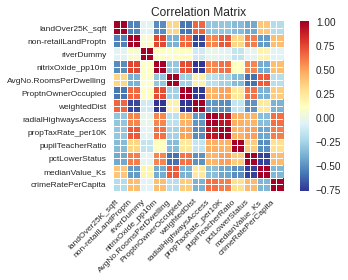

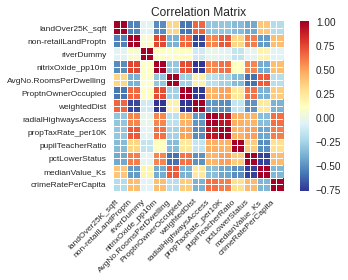

In [ ]:

xnames=list(train_data.columns)
ynames=list(train_data.columns)

plot_corr(corrMatrix,xnames=xnames,ynames=ynames,cmap='RdYlBu_r')